# Regression Power Consumption

In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

In [75]:
#loading the dataset

In [76]:
data = pd.read_csv("household_power_consumption.csv") # Reading the Data

C:\Users\Admin\AppData\Local\Temp\ipykernel_4816\703455930.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("household_power_consumption.csv") # Reading the Data


In [77]:
data = data.sample(15000)

# Exploratory Data Analysis

In [78]:
# Making a copy of the data
data1 = data.copy()

In [79]:
data1.head(5)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
1131492,9/2/2009,11:36:00,1.668,0.000,239.630,6.800,0.000,0.000,18.0
1903520,30/7/2010,14:44:00,0.248,0.108,239.360,1.000,0.000,0.000,1.0
1377791,30/7/2009,12:35:00,0.228,0.092,244.180,1.000,0.000,0.000,0.0
23835,2/1/2007,06:39:00,0.380,0.000,243.230,1.600,0.000,0.000,0.0
1050737,15/12/2008,09:41:00,1.346,0.054,242.130,5.600,0.000,0.000,18.0


In [80]:
data1.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [81]:
data1.shape

(15000, 9)

In [82]:
# info of the dataset
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 1131492 to 190265
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   15000 non-null  object 
 1   Time                   15000 non-null  object 
 2   Global_active_power    15000 non-null  object 
 3   Global_reactive_power  15000 non-null  object 
 4   Voltage                15000 non-null  object 
 5   Global_intensity       15000 non-null  object 
 6   Sub_metering_1         15000 non-null  object 
 7   Sub_metering_2         15000 non-null  object 
 8   Sub_metering_3         14827 non-null  float64
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [83]:
# Check duplicate if any
data1[data1.duplicated()]

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3


In [84]:
list1 = data1.columns.tolist()
for i in list1:
    print(data1.groupby([i]).size().sort_values(ascending=False))
    print("**********************")

Date
27/6/2009     22
17/4/2007     21
12/6/2008     21
4/5/2010      20
6/6/2008      20
              ..
22/1/2009      3
10/11/2007     3
26/8/2010      3
23/2/2010      2
16/12/2006     1
Length: 1442, dtype: int64
**********************
Time
09:08:00    22
23:25:00    21
20:38:00    21
12:45:00    20
14:37:00    20
            ..
23:46:00     3
13:29:00     3
18:17:00     3
20:14:00     3
21:47:00     3
Length: 1440, dtype: int64
**********************
Global_active_power
?        173
0.306     79
0.314     74
0.320     73
0.228     73
        ... 
2.760      1
2.778      1
2.780      1
2.788      1
1.908      1
Length: 2270, dtype: int64
**********************
Global_reactive_power
0.000    3470
?         173
0.104     171
0.108     165
0.100     165
         ... 
0.212       1
0.208       1
0.442       1
0.476       1
0.354       1
Length: 411, dtype: int64
**********************
Voltage
?          173
241.870     36
241.440     35
241.130     35
242.180     34
          ... 
24

Global_active_power column has 186 rows with value ?
Global_reactive_power column has 186 rows with value ?
Voltage column has 186 rows with value ?
Sub_metering_1 has 186 rows with value ?
Sub_metering_2 has 186 rows with value ?


In [85]:
# Check for missing data
data1.isnull().sum()


Date                       0
Time                       0
Global_active_power        0
Global_reactive_power      0
Voltage                    0
Global_intensity           0
Sub_metering_1             0
Sub_metering_2             0
Sub_metering_3           173
dtype: int64

In [86]:
# replacing special characters
chars_to_remove=['?']
cols_to_clean=['Global_active_power','Global_reactive_power','Voltage','Global_intensity','Sub_metering_1','Sub_metering_2']
for item in chars_to_remove:
    for col in cols_to_clean:
        data1[col]=data1[col].replace(item,np.nan)

In [87]:
data.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [106]:
# Display first five records of the data
data1.head(5)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
1131492,2009-09-02,11:36:00,1.668,0.000,239.63,6.8,0.0,0.0,18.0
1903520,2010-07-30,14:44:00,0.248,0.108,239.36,1.0,0.0,0.0,1.0
1377791,2009-07-30,12:35:00,0.228,0.092,244.18,1.0,0.0,0.0,0.0
23835,2007-02-01,06:39:00,0.380,0.000,243.23,1.6,0.0,0.0,0.0
1050737,2008-12-15,09:41:00,1.346,0.054,242.13,5.6,0.0,0.0,18.0


In [89]:
# Converting data types
columns = ['Global_active_power','Global_reactive_power','Voltage','Global_intensity','Sub_metering_1','Sub_metering_2']
for col in columns:
    data1[col]=data1[col].astype(float)

In [90]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 1131492 to 190265
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   15000 non-null  object 
 1   Time                   15000 non-null  object 
 2   Global_active_power    14827 non-null  float64
 3   Global_reactive_power  14827 non-null  float64
 4   Voltage                14827 non-null  float64
 5   Global_intensity       14827 non-null  float64
 6   Sub_metering_1         14827 non-null  float64
 7   Sub_metering_2         14827 non-null  float64
 8   Sub_metering_3         14827 non-null  float64
dtypes: float64(7), object(2)
memory usage: 1.1+ MB


In [91]:
data1.shape

(15000, 9)

In [92]:
# convert object datatype to datetime dtype
data1['Date'] = pd.to_datetime(data1["Date"])

C:\Users\Admin\AppData\Local\Temp\ipykernel_4816\3686951426.py:2: UserWarning: Parsing '15/12/2008' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data1['Date'] = pd.to_datetime(data1["Date"])
C:\Users\Admin\AppData\Local\Temp\ipykernel_4816\3686951426.py:2: UserWarning: Parsing '15/10/2009' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data1['Date'] = pd.to_datetime(data1["Date"])
C:\Users\Admin\AppData\Local\Temp\ipykernel_4816\3686951426.py:2: UserWarning: Parsing '23/11/2009' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data1['Date'] = pd.to_datetime(data1["Date"])
C:\Users\Admin\AppData\Local\Temp\ipykernel_4816\3686951426.py:2: UserWarning: Parsing '31/10/2008' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data1['Date'] = pd.to_datetime(data1["Date"])
C:\Users\Adm

C:\Users\Admin\AppData\Local\Temp\ipykernel_4816\3686951426.py:2: UserWarning: Parsing '21/12/2009' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data1['Date'] = pd.to_datetime(data1["Date"])
C:\Users\Admin\AppData\Local\Temp\ipykernel_4816\3686951426.py:2: UserWarning: Parsing '17/11/2007' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data1['Date'] = pd.to_datetime(data1["Date"])
C:\Users\Admin\AppData\Local\Temp\ipykernel_4816\3686951426.py:2: UserWarning: Parsing '14/10/2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data1['Date'] = pd.to_datetime(data1["Date"])
C:\Users\Admin\AppData\Local\Temp\ipykernel_4816\3686951426.py:2: UserWarning: Parsing '19/10/2009' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data1['Date'] = pd.to_datetime(data1["Date"])
C:\Users\Adm

C:\Users\Admin\AppData\Local\Temp\ipykernel_4816\3686951426.py:2: UserWarning: Parsing '13/11/2008' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data1['Date'] = pd.to_datetime(data1["Date"])
C:\Users\Admin\AppData\Local\Temp\ipykernel_4816\3686951426.py:2: UserWarning: Parsing '20/10/2008' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data1['Date'] = pd.to_datetime(data1["Date"])
C:\Users\Admin\AppData\Local\Temp\ipykernel_4816\3686951426.py:2: UserWarning: Parsing '19/12/2008' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data1['Date'] = pd.to_datetime(data1["Date"])
C:\Users\Admin\AppData\Local\Temp\ipykernel_4816\3686951426.py:2: UserWarning: Parsing '17/10/2008' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data1['Date'] = pd.to_datetime(data1["Date"])
C:\Users\Adm

In [93]:
# Separating numerical and categorical features
num_features = [feature for feature in data1.columns if data1[feature].dtype!='O']
cat_features = [feature for feature in data1.columns if data1[feature].dtype=='O']

In [94]:
num_features

['Date',
 'Global_active_power',
 'Global_reactive_power',
 'Voltage',
 'Global_intensity',
 'Sub_metering_1',
 'Sub_metering_2',
 'Sub_metering_3']

In [95]:
cat_features

['Time']

In [96]:
# Univariate analysis

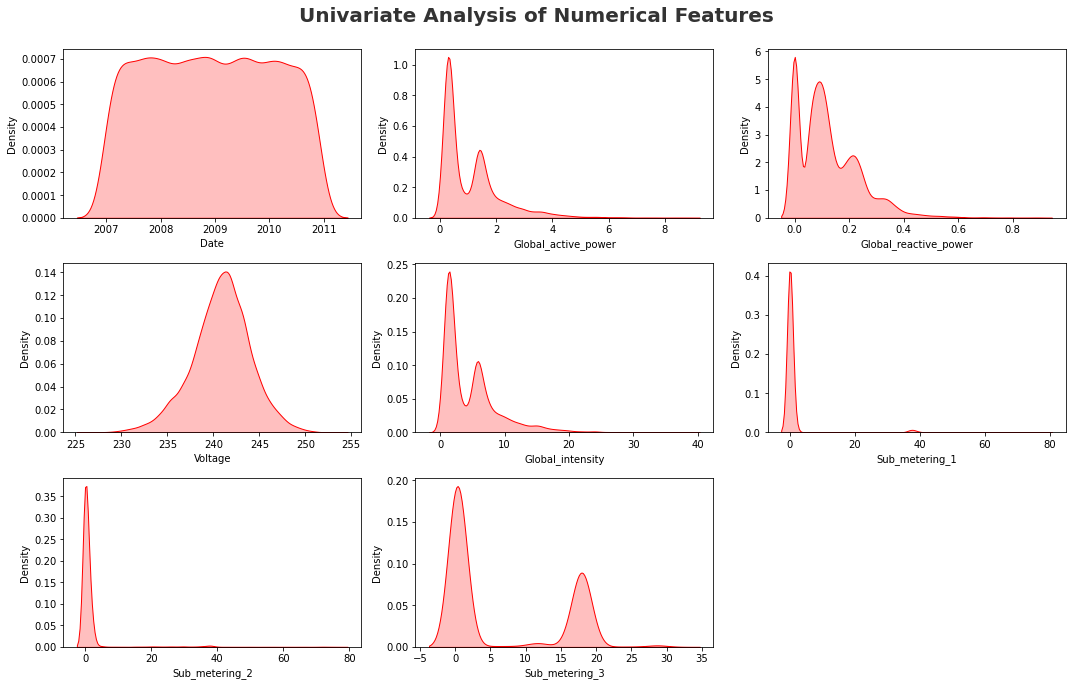

In [97]:
# kdeplot of numerical features
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(num_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=data1[num_features[i]],shade=True, color='r')
    plt.xlabel(num_features[i])
    plt.tight_layout()

Analysis

In [98]:
data1.isna().sum()

Date                       0
Time                       0
Global_active_power      173
Global_reactive_power    173
Voltage                  173
Global_intensity         173
Sub_metering_1           173
Sub_metering_2           173
Sub_metering_3           173
dtype: int64

In [99]:
data1.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [100]:
cols=[var for var in data1.columns if data1[var].isnull().mean()*100]
cols

['Global_active_power',
 'Global_reactive_power',
 'Voltage',
 'Global_intensity',
 'Sub_metering_1',
 'Sub_metering_2',
 'Sub_metering_3']

In [101]:
data2 = data1.dropna()

In [102]:
data2.isna().sum().sum()

0

In [62]:
data1 = data1.isna().sum().sum()

Creating the Target Variable

In [107]:
data2['Energy_consumption'] = data2['Sub_metering_1'] + data2['Sub_metering_2'] + data2['Sub_metering_3']

C:\Users\Admin\AppData\Local\Temp\ipykernel_4816\2458534706.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Energy_consumption'] = data2['Sub_metering_1'] + data2['Sub_metering_2'] + data2['Sub_metering_3']


In [108]:
data2.head(2)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Energy_consumption
1131492,2009-09-02,11:36:00,1.668,0.000,239.63,6.8,0.0,0.0,18.0,18.0
1903520,2010-07-30,14:44:00,0.248,0.108,239.36,1.0,0.0,0.0,1.0,1.0
